## Dataset

### headlines.csv

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [2]:
df = pd.read_csv("headlines.csv",header=None)
df

,0
0,Budget to set scene for election\n \n Gordon B...
1,Army chiefs in regiments decision\n \n Militar...
2,Howard denies split over ID cards\n \n Michael...
3,Observers to monitor UK election\n \n Minister...
4,Kilroy names election seat target\n \n Ex-chat...
...,...
2220,India opens skies to competition\n \n India wi...
2221,Yukos bankruptcy 'not US matter'\n \n Russian ...
2222,Survey confirms property slowdown\n \n Governm...
2223,High fuel prices hit BA's profits\n \n British...


In [4]:
print(df.iloc[0,:])

0    Budget to set scene for election\n \n Gordon B...
Name: 0, dtype: object


### Data cleaning

In [8]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

In [9]:
swords = stopwords.words('english')
wnl = WordNetLemmatizer()

In [29]:
def lemmatize(word):
    tag = pos_tag([word])
    pos = 'n'
    #print(tag)
    if tag[0][1].startswith('V'):
        pos = 'v'
    elif tag[0][1].startswith('R'):
        pos = 'r'
    elif tag[0][1].startswith('J'):
        pos = 'a'
    return wnl.lemmatize(word, pos = pos)

In [30]:
lemmatize('Clark')

'Clark'

In [31]:
## Analyzer function
def clean_text(sent):
    tokens1 = word_tokenize(sent) ## tokenize
    tokens2 = [token for token in tokens1 if token.isalnum()] ## remove punctuations
    tokens3 = [token.lower() for token in tokens2 if token.lower() not in swords] ## Remove stopwords
    tokens4 = [lemmatize(token) for token in tokens3]
    return tokens4

In [32]:
sent = 'Hello friends! How are you? He likes Python Programming'
clean_text(sent)

['hello', 'friend', 'like', 'python', 'program']

### TF*IDF vectorize

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
tfv = TfidfVectorizer(analyzer = clean_text)

In [37]:
%%time
x_new = tfv.fit_transform(df[0])
x_new

CPU times: total: 3min 13s
Wall time: 3min 19s


<2225x22483 sparse matrix of type '<class 'numpy.float64'>'
	with 319728 stored elements in Compressed Sparse Row format>

### Kmeans clustering

In [39]:
from sklearn.cluster import KMeans

In [41]:
km = KMeans(random_state=0)
km.fit_predict(x_new)

array([4, 6, 4, ..., 2, 5, 2])

In [42]:
set(km.labels_)

{0, 1, 2, 3, 4, 5, 6, 7}

In [44]:
km.inertia_

2067.4969194117366

### Elbow method for detemining no of clusters

In [48]:
sse = []
for k in range(2,16):
    km = KMeans(n_clusters = k, random_state = 0, n_init = 'auto')
    km.fit_predict(x_new)   
    sse.append(km.inertia_)

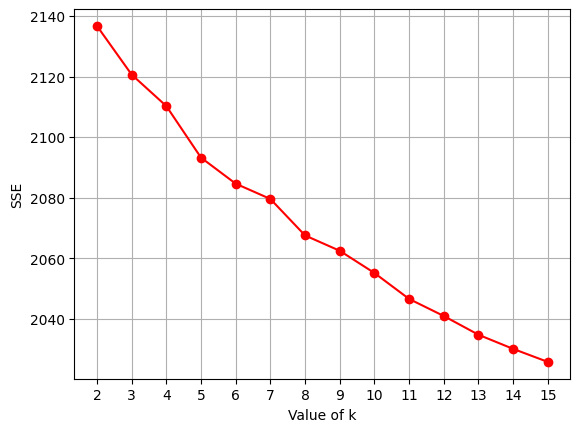

In [50]:
plt.xlabel('Value of k')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(2,16))
plt.plot( range(2,16), sse, marker = 'o', color = 'r')

### K = 5

In [53]:
km = KMeans(n_clusters = 5, random_state = 0, n_init = 'auto')
labels = km.fit_predict(x_new)
labels

array([4, 3, 4, ..., 3, 3, 3])

### Separate the clusters

In [57]:
zero = df[labels == 0] 
one = df[labels == 1] 
two = df[labels == 2] 
three = df[labels == 3] 
four = df[labels == 4] 

print('Cluster - 0 : ', len(zero))
print('Cluster - 1 : ', len(one))
print('Cluster - 2 : ', len(two))
print('Cluster - 3 : ', len(three))
print('Cluster - 4 : ', len(four))

Cluster - 0 :  376
Cluster - 1 :  331
Cluster - 2 :  521
Cluster - 3 :  716
Cluster - 4 :  281


### WordCloud

In [58]:
from wordcloud import WordCloud

## Zero

In [74]:
zero

,0
72,MPs issued with Blackberry threat\n \n MPs wil...
247,Game warnings 'must be clearer'\n \n Violent v...
300,MPs issued with Blackberry threat\n \n MPs wil...
373,UK firms 'embracing e-commerce'\n \n UK firms ...
928,Digital UK driven by net and TV\n \n The UK's ...
...,...
1820,News Corp eyes video games market\n \n News Co...
1861,Brussels raps mobile call charges\n \n The Eur...
2054,Making your office work for you\n \n Our missi...
2138,Orange colour clash set for court\n \n A row o...


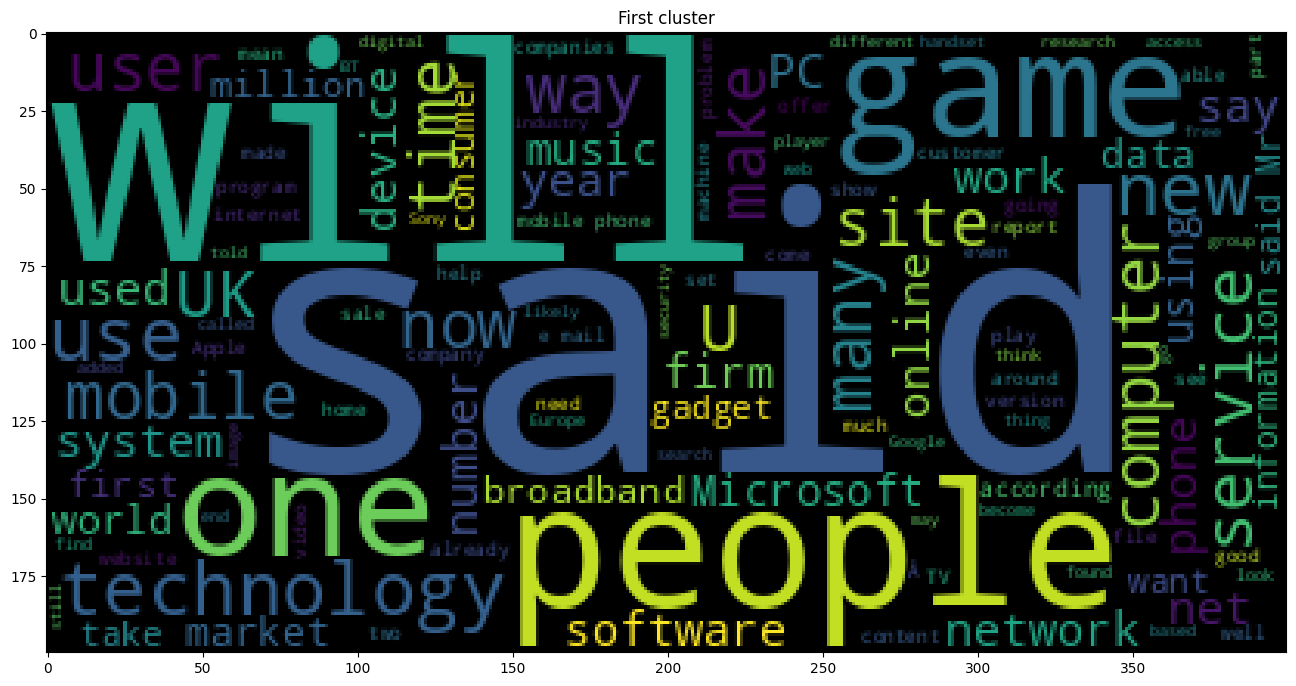

In [75]:
wc = WordCloud().generate(' '.join(zero[0]))
plt.figure(figsize = (16,9))
plt.title('First cluster')
plt.imshow(wc)

### Technological

In [76]:
from nltk import FreqDist
new = " ".join(zero[0])
clean = [x.lower() for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)

[('said', 1521),
 ('people', 945),
 ('also', 513),
 ('new', 495),
 ('technology', 486),
 ('mobile', 478),
 ('mr', 475),
 ('one', 471),
 ('would', 445),
 ('music', 438)]

## One

In [64]:
one

,0
502,Holmes feted with further honour\n \n Double O...
622,Gatlin and Hayes win Owen awards\n \n American...
964,Half-Life 2 sweeps Bafta awards\n \n PC first ...
1017,'Ultimate game' award for Doom 3\n \n Sci-fi s...
1031,What high-definition will do to DVDs\n \n Firs...
...,...
1711,Springer criticises Opera musical\n \n Talk sh...
1712,Deal to ban 'homophobic' reggae\n \n The regga...
1713,Richard and Judy choose top books\n \n The 10 ...
1714,Paraguay novel wins US book prize\n \n A novel...


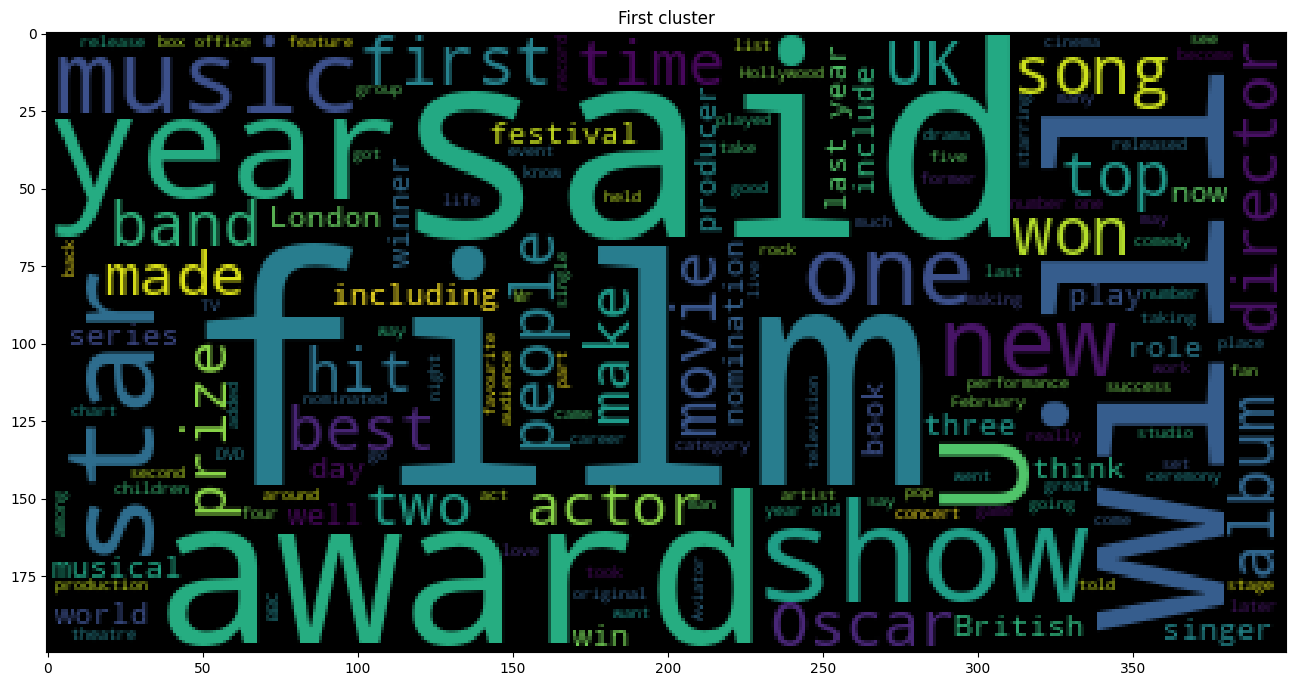

In [66]:
wc = WordCloud().generate(' '.join(one[0]))
plt.figure(figsize = (16,9))
plt.title('First cluster')
plt.imshow(wc)

### Entertainment new

In [68]:
from nltk import FreqDist
new = " ".join(one[0])
clean = [x.lower() for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)

[('film', 776),
 ('said', 623),
 ('best', 613),
 ('also', 351),
 ('music', 346),
 ('year', 337),
 ('one', 320),
 ('awards', 302),
 ('new', 289),
 ('us', 285)]

## Two

In [73]:
two

,0
168,Howard 'truanted to play snooker'\n \n Conserv...
219,Jamieson issues warning to bigots\n \n Scotlan...
417,Hodges announces rugby retirement\n \n Scarlet...
418,Bomb threat at Bernabeu stadium\n \n Spectator...
419,Parmar ruled out of Davis Cup tie\n \n A knee ...
...,...
1172,Players sought for $1m prize\n \n UK gamers ar...
1232,Gritty return for Prince of Persia\n \n Still ...
1360,Obituary: Dame Alicia Markova\n \n Dame Alicia...
1419,'My memories of Marley...'\n \n To mark the 60...


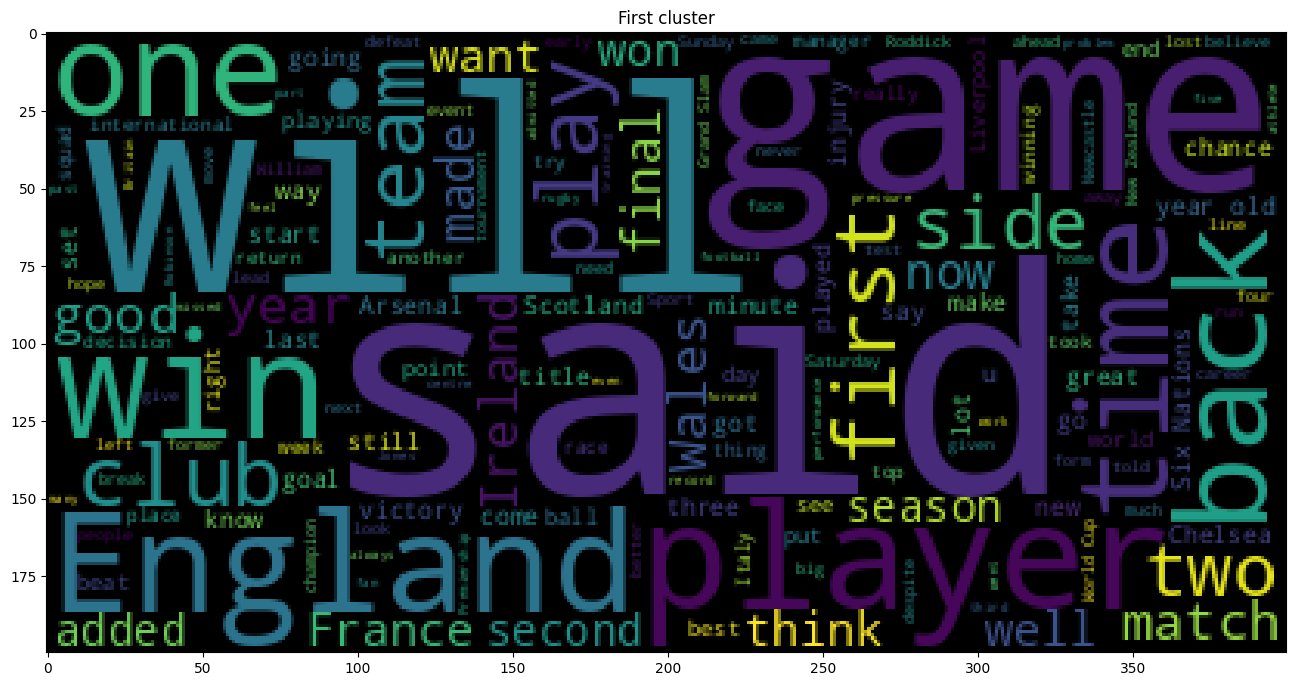

In [69]:
wc = WordCloud().generate(' '.join(two[0]))
plt.figure(figsize = (16,9))
plt.title('First cluster')
plt.imshow(wc)

### Sports

In [71]:
from nltk import FreqDist
new = " ".join(two[0])
clean = [x.lower() for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)

[('said', 967),
 ('game', 521),
 ('england', 465),
 ('first', 448),
 ('would', 422),
 ('win', 412),
 ('world', 402),
 ('last', 383),
 ('one', 369),
 ('two', 359)]

## Three

In [77]:
three

,0
1,Army chiefs in regiments decision\n \n Militar...
6,Research fears over Kelly's views\n \n Scienti...
10,Hatfield executives go on trial\n \n Engineeri...
16,Ministers deny care sums 'wrong'\n \n Minister...
17,Straw praises Kashmir moves\n \n The UK has we...
...,...
2220,India opens skies to competition\n \n India wi...
2221,Yukos bankruptcy 'not US matter'\n \n Russian ...
2222,Survey confirms property slowdown\n \n Governm...
2223,High fuel prices hit BA's profits\n \n British...


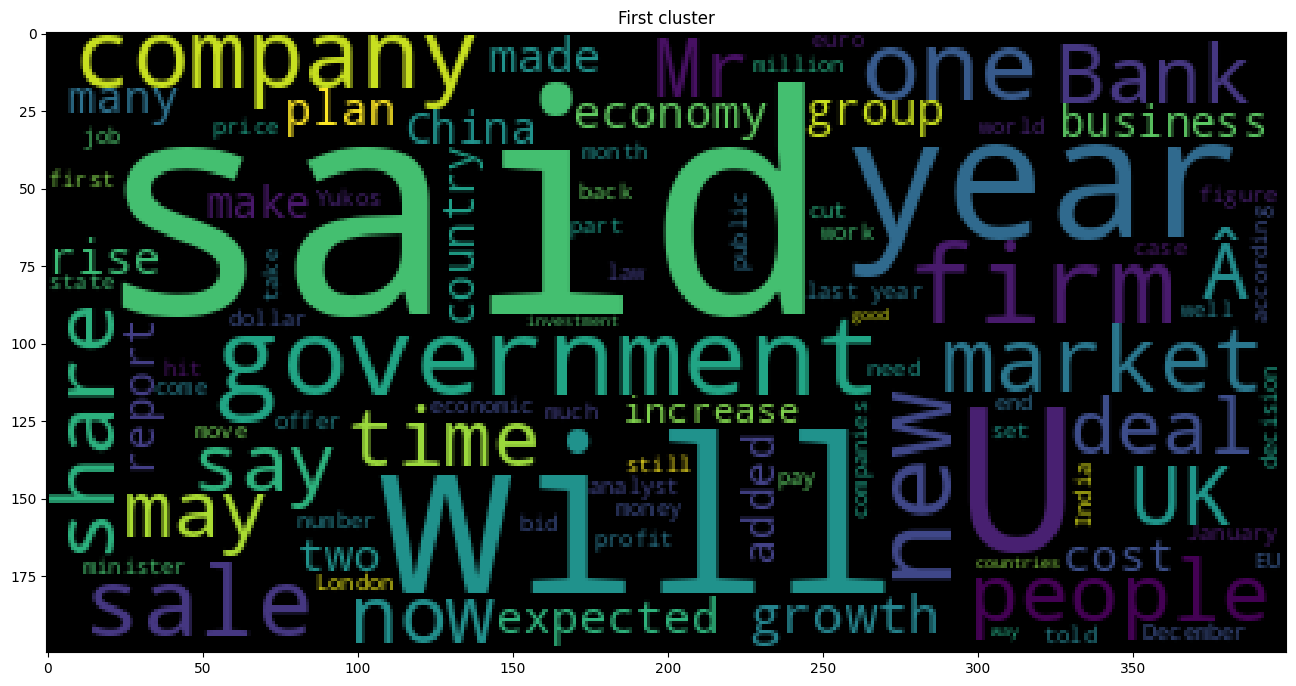

In [78]:
wc = WordCloud().generate(' '.join(three[0]))
plt.figure(figsize = (16,9))
plt.title('First cluster')
plt.imshow(wc)

### Financial

In [79]:
from nltk import FreqDist
new = " ".join(three[0])
clean = [x.lower() for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)

[('said', 2614),
 ('us', 980),
 ('mr', 867),
 ('would', 777),
 ('year', 776),
 ('also', 616),
 ('new', 580),
 ('government', 557),
 ('last', 467),
 ('could', 464)]

## Four

In [80]:
four

,0
0,Budget to set scene for election\n \n Gordon B...
2,Howard denies split over ID cards\n \n Michael...
3,Observers to monitor UK election\n \n Minister...
4,Kilroy names election seat target\n \n Ex-chat...
5,Donor attacks Blair-Brown 'feud'\n \n The repo...
...,...
415,Labour chooses Manchester\n \n The Labour Part...
416,Brown visits slum on Africa trip\n \n Chancell...
1719,World leaders gather to face uncertainty\n \n ...
1751,Golden rule boost for Chancellor\n \n Chancell...


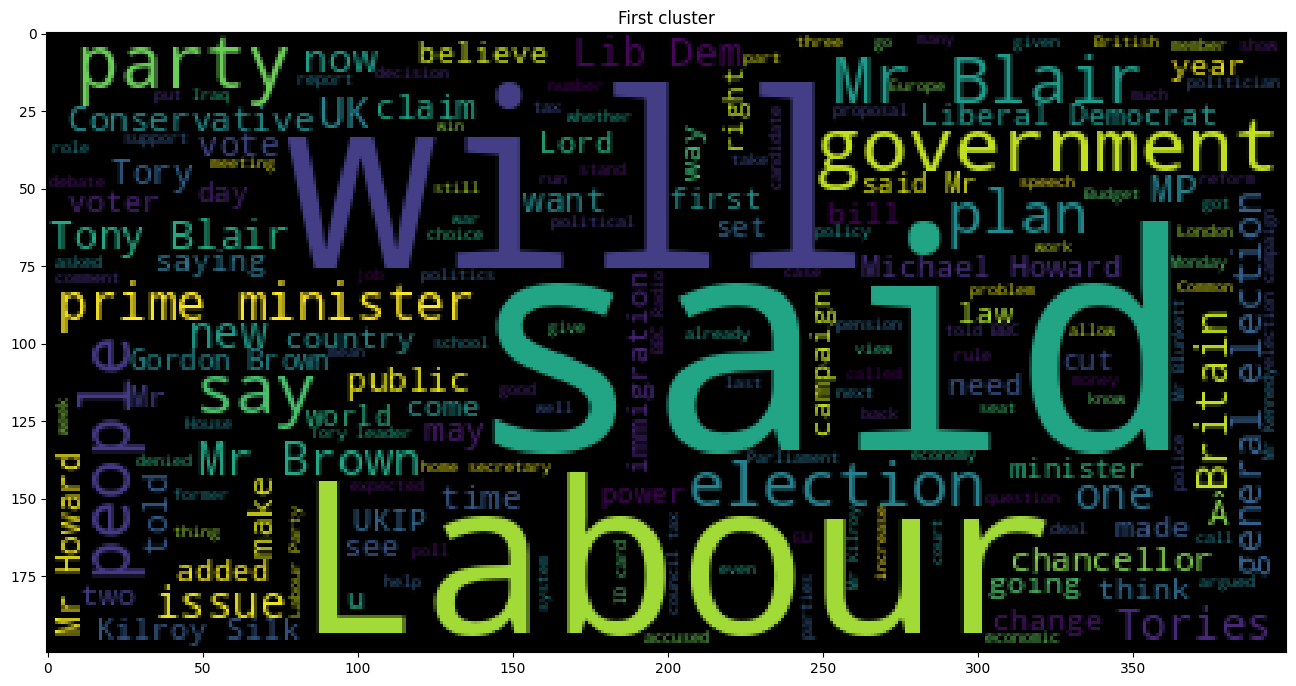

In [81]:
wc = WordCloud().generate(' '.join(four[0]))
plt.figure(figsize = (16,9))
plt.title('First cluster')
plt.imshow(wc)

### Polytics

In [82]:
from nltk import FreqDist
new = " ".join(four[0])
clean = [x.lower() for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)

[('said', 1528),
 ('mr', 1485),
 ('would', 816),
 ('labour', 731),
 ('election', 563),
 ('blair', 540),
 ('party', 536),
 ('government', 516),
 ('people', 452),
 ('brown', 375)]